In [1]:
# import
import requests
import time
import json
from datetime import datetime
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import csv

In [10]:
Allston_a = []
South_Boston_a = []
Jamaica_Plain_a = []
Back_Bay_a = []
East_Boston_a = []

path = "/Users/gejiali/学习/ECE/Spring2018/EC500/project/test1/"
test_case = ["Allston", "South Boston","Jamaica Plain", "Back Bay", "East Boston"]
file_air = ["tomslee_airbnb_boston_0282_2016-01-16.csv","tomslee_airbnb_boston_0314_2016-02-16.csv",
            "tomslee_airbnb_boston_0344_2016-03-18.csv","tomslee_airbnb_boston_0386_2016-04-14.csv",
            "tomslee_airbnb_boston_0420_2016-05-18.csv","tomslee_airbnb_boston_0461_2016-06-18.csv",
            "tomslee_airbnb_boston_0489_2016-07-16.csv","tomslee_airbnb_boston_0524_2016-08-19.csv",
            "tomslee_airbnb_boston_0566_2016-09-16.csv", "tomslee_airbnb_boston_0610_2016-10-18.csv",
            "tomslee_airbnb_boston_0779_2017-01-14.csv", "tomslee_airbnb_boston_0858_2017-02-16.csv",
            "tomslee_airbnb_boston_0931_2017-03-12.csv", "tomslee_airbnb_boston_1043_2017-04-08.csv",
            "tomslee_airbnb_boston_1187_2017-05-05.csv", "tomslee_airbnb_boston_1309_2017-06-10.csv",
            "tomslee_airbnb_boston_1429_2017-07-10.csv"]

for i in range(3):
    A1 = []
    S1 = []
    J1 = []
    B1 = []
    E1 = []
    for name in file_air:
        file = path + name
        df = pd.read_csv(file)
        df = df[df.room_type == "Entire home/apt"]
        df = df[df.bedrooms == i+1]
        A1.append(df[df.neighborhood == "Allston"]["price"].median() * 30)
        S1.append(df[df.neighborhood == "South Boston"]["price"].median() * 30)
        J1.append(df[df.neighborhood == "Jamaica Plain"]["price"].median() * 30)
        B1.append(df[df.neighborhood == "Back Bay"]["price"].median() * 30)
        E1.append(df[df.neighborhood == "East Boston"]["price"].median() * 30)
    Allston_a.append(A1)
    South_Boston_a.append(S1)
    Jamaica_Plain_a.append(J1)
    Back_Bay_a.append(B1)
    East_Boston_a.append(E1)
print(Allston_a[0])

[3750.0, 3735.0, 3210.0, 3825.0, 3600.0, 3600.0, 3885.0, 3900.0, 3870.0, 3600.0, 3150.0, 3000.0, 3000.0, 3000.0, 3000.0, 3135.0, 3600.0]


In [12]:
Allston_b = []
South_Boston_b = []
Jamaica_Plain_b = []
Back_Bay_b = []
East_Boston_b = []

file_zillow = ["Neighborhood_MedianRentalPrice_1Bedroom.csv", "Neighborhood_MedianRentalPrice_2Bedroom.csv",
               "Neighborhood_MedianRentalPrice_3Bedroom.csv"]
for names in file_zillow:
    Allston1 = []
    South_Boston1 = []
    Jamaica_Plain1 = []
    Back_Bay1 = []
    East_Boston1 = []
    f = path + names
    df = pd.read_csv(f)
    df = df[df.City == "Boston"]
    df = df.loc[df['RegionName'].isin(test_case)]
    for month in range(70,94):
        ndf = df.iloc[:,month]
        #print(ndf)
        East_Boston1.append(ndf.iloc[0,])
        Jamaica_Plain1.append(ndf.iloc[1,])
        South_Boston1.append(ndf.iloc[2,])
        Allston1.append(ndf.iloc[3,])
        Back_Bay1.append(ndf.iloc[4,])

    East_Boston_b.append(East_Boston1)
    Jamaica_Plain_b.append(Jamaica_Plain1)
    South_Boston_b.append(South_Boston1)
    Allston_b.append(Allston1)
    Back_Bay_b.append(Back_Bay1)
print(len(Allston_b))

print(len(Allston_b[2]))
print(Back_Bay_b)

3
24
[[2500.0, 2500.0, 2500.0, 2495.0, 2500.0, 2500.0, 2500.0, 2500.0, 2515.0, 2500.0, 2480.0, 2500.0, 2450.0, 2600.0, 2600.0, 2600.0, 2600.0, 2600.0, 2600.0, 2595.0, 2600.0, 2600.0, 2575.0, 2500.0], [3915.0, 3995.0, 3970.0, 3900.0, 3745.0, 3800.0, 3600.0, 3967.5, 3950.0, 3950.0, 3850.0, 3999.0, 3850.0, 3898.5, 3700.0, 3700.0, 3600.0, 3850.0, 3975.0, 3900.0, 3860.0, 3900.0, 3850.0, 3825.0], [4800.0, 4800.0, 4750.0, 4750.0, 4800.0, 4800.0, 5175.0, 5400.0, 5497.5, 5250.0, 5250.0, 5500.0, 6000.0, 5869.0, 5137.5, 4850.0, 4700.0, 4775.0, 5000.0, 5000.0, 4590.0, 4700.0, 5000.0, 5400.0]]


In [14]:
Allston_z = [0]*3
South_Boston_z = [0]*3
Jamaica_Plain_z = [0]*3
Back_Bay_z = [0]*3
East_Boston_z = [0]*3

for i in range(3):
    if i == 0:
        East_Boston_z[i] = East_Boston_b[i][4:14] + East_Boston_b[i][16:23]
        Jamaica_Plain_z[i] = Jamaica_Plain_b[i][4:14] + Jamaica_Plain_b[i][16:23]
        South_Boston_z[i] = South_Boston_b[i][4:14] + South_Boston_b[i][16:23]
        Allston_z[i] = Allston_b[i][4:14] + Allston_b[i][16:23]
        Back_Bay_z[i] = Back_Bay_b[i][4:14] + Back_Bay_b[i][16:23]
    if i == 1:
        East_Boston_z[i] = East_Boston_b[i][0:10] + East_Boston_b[i][12:19]
        Jamaica_Plain_z[i] = Jamaica_Plain_b[i][0:10] + Jamaica_Plain_b[i][12:19]
        South_Boston_z[i] = South_Boston_b[i][0:10] + South_Boston_b[i][12:19]
        Allston_z[i] = Allston_b[i][0:10] + Allston_b[i][12:19]
        Back_Bay_z[i] = Back_Bay_b[i][0:10] + Back_Bay_b[i][12:19]
    if i == 2:
        East_Boston_z[i] = East_Boston_b[i][5:15] + East_Boston_b[i][17:24]
        Jamaica_Plain_z[i] = Jamaica_Plain_b[i][5:15] + Jamaica_Plain_b[i][17:24]
        South_Boston_z[i] = South_Boston_b[i][5:15] + South_Boston_b[i][17:24]
        Allston_z[i] = Allston_b[i][5:15] + Allston_b[i][17:24]
        Back_Bay_z[i] = Back_Bay_b[i][5:15] + Back_Bay_b[i][17:24]
        
print(Allston_z)
print(Back_Bay_z)

[[1675.0, 1695.0, 1725.0, 1725.0, 1725.0, 1700.0, 1700.0, 1700.0, 1695.0, 1695.0, 1700.0, 1750.0, 1775.0, 1775.0, 1775.0, 1775.0, 1775.0], [1995.0, 2000.0, 2075.0, 2090.0, 2100.0, 2090.0, 2100.0, 2100.0, 2100.0, 2050.0, 2100.0, 2200.0, 2200.0, 2195.0, 2200.0, 2200.0, 2275.0], [2700.0, 2700.0, 2700.0, 2700.0, 2690.0, 2700.0, 2650.0, 2600.0, 2600.0, 2600.0, 2800.0, 2800.0, 2800.0, 2795.0, 2800.0, 2800.0, 2750.0]]
[[2500.0, 2500.0, 2500.0, 2500.0, 2515.0, 2500.0, 2480.0, 2500.0, 2450.0, 2600.0, 2600.0, 2600.0, 2600.0, 2595.0, 2600.0, 2600.0, 2575.0], [3915.0, 3995.0, 3970.0, 3900.0, 3745.0, 3800.0, 3600.0, 3967.5, 3950.0, 3950.0, 3850.0, 3898.5, 3700.0, 3700.0, 3600.0, 3850.0, 3975.0], [4800.0, 5175.0, 5400.0, 5497.5, 5250.0, 5250.0, 5500.0, 6000.0, 5869.0, 5137.5, 4775.0, 5000.0, 5000.0, 4590.0, 4700.0, 5000.0, 5400.0]]


In [19]:
## mean of zillow rent price
a1 = sum(Allston_z[0])
a2 = sum(Allston_z[1])
a3 = sum(Allston_z[2])
a = a1+a2+a3
l1 = len(Allston_z[0])
l2 = len(Allston_z[1])
l3 = len(Allston_z[2])
l = l1+l2+l3
print("Allston mean")
print(a/l)

sa1 = sum(South_Boston_z[0])
sa2 = sum(South_Boston_z[1])
sa3 = sum(South_Boston_z[2])
sa = sa1+sa2+sa3
sl1 = len(South_Boston_z[0])
sl2 = len(South_Boston_z[1])
sl3 = len(South_Boston_z[2])
sl = sl1+sl2+sl3
print("South_Boston mean")
print(sa/sl)

ja1 = sum(Jamaica_Plain_z[0])
ja2 = sum(Jamaica_Plain_z[1])
ja3 = sum(Jamaica_Plain_z[2])
ja = ja1+ja2+ja3
jl1 = len(Jamaica_Plain_z[0])
jl2 = len(Jamaica_Plain_z[1])
jl3 = len(Jamaica_Plain_z[2])
jl = jl1+jl2+jl3
print("Jamaica_Plain mean")
print(ja/jl)

ba1 = sum(Back_Bay_z[0])
ba2 = sum(Back_Bay_z[1])
ba3 = sum(Back_Bay_z[2])
ba = ba1+ba2+ba3
bl1 = len(Back_Bay_z[0])
bl2 = len(Back_Bay_z[1])
bl3 = len(Back_Bay_z[2])
bl = bl1+bl2+bl3
print("Back_Bay mean")
print(ba/bl)

ea1 = sum(East_Boston_z[0])
ea2 = sum(East_Boston_z[1])
ea3 = sum(East_Boston_z[2])
ea = ea1+ea2+ea3
el1 = len(East_Boston_z[0])
el2 = len(East_Boston_z[1])
el3 = len(East_Boston_z[2])
el = el1+el2+el3
print("East_Boston mean")
print(ea/el)

Allston mean
2188.52941176
South_Boston mean
3033.54901961
Jamaica_Plain mean
2312.35294118
Back_Bay mean
3861.2745098
East_Boston mean
2012.91176471


In [15]:
Allston = []
South_Boston = []
Jamaica_Plain = []
Back_Bay = []
East_Boston = []

for i in range(3):
    Allston.append(list(map(lambda x: x[0]-x[1], zip(Allston_a[i], Allston_z[i]))))
    South_Boston.append(list(map(lambda x: x[0]-x[1], zip(South_Boston_a[i], South_Boston_z[i]))))
    Jamaica_Plain.append(list(map(lambda x: x[0]-x[1], zip(Jamaica_Plain_a[i], Jamaica_Plain_z[i]))))
    Back_Bay.append(list(map(lambda x: x[0]-x[1], zip(Back_Bay_a[i], Back_Bay_z[i]))))
    East_Boston.append(list(map(lambda x: x[0]-x[1], zip(East_Boston_a[i], East_Boston_z[i]))))
print(Allston)
print(South_Boston)
print(Jamaica_Plain)
print(Back_Bay)
print(East_Boston)      

[[2075.0, 2040.0, 1485.0, 2100.0, 1875.0, 1900.0, 2185.0, 2200.0, 2175.0, 1905.0, 1450.0, 1250.0, 1225.0, 1225.0, 1225.0, 1360.0, 1825.0], [2610.0, 2425.0, 3055.0, 2860.0, 3585.0, 3760.0, 3870.0, 3870.0, 3870.0, 3920.0, 2400.0, 2300.0, 2300.0, 2305.0, 2240.0, 2120.0, 2225.0], [7050.0, 7050.0, 6300.0, 1800.0, 2260.0, 3900.0, 4220.0, 3670.0, 4570.0, 4570.0, 170.0, 170.0, 20.0, 25.0, 920.0, 1070.0, 1270.0]]
[[2729.0, 2661.5, 2750.0, 3222.0, 2603.0, 2850.0, 2525.0, 2585.5, 2550.0, 2721.0, 2115.0, 2850.0, 2800.0, 2480.5, 1963.0, 1631.0, 1625.0], [3200.0, 3100.0, 3100.0, 4450.0, 4150.0, 4535.0, 4500.0, 4400.0, 4500.0, 3855.0, 3000.0, 3000.0, 3050.0, 3415.0, 3515.0, 3440.0, 3145.0], [2975.0, 2500.0, 3350.0, 6350.0, 3250.0, 5500.0, 5877.5, 5760.0, 4750.0, 4950.0, 5470.0, 5500.0, 6000.0, 5340.0, 6195.0, 6540.0, 3570.0]]
[[2150.0, 2205.0, 2205.0, 1900.0, 1925.0, 1900.0, 2137.5, 2100.0, 2025.0, 2000.0, 1300.0, 1400.0, 1350.0, 1770.0, 1650.0, 1975.0, 2250.0], [3125.0, 3200.0, 3200.0, 3105.0, 3065.

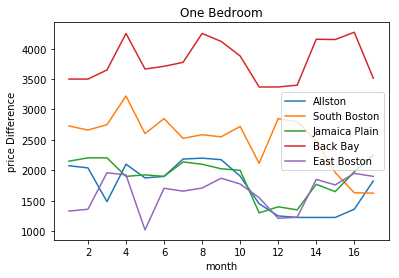

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(1, 18)
plt.plot(x, Allston[0], label = "Allston")
plt.plot(x, South_Boston[0], label = "South Boston")
plt.plot(x, Jamaica_Plain[0], label = "Jamaica Plain")
plt.plot(x, Back_Bay[0], label = "Back Bay")
plt.plot(x, East_Boston[0], label = "East Boston")
plt.xlabel("month")
plt.ylabel("price Difference")
plt.title("One Bedroom")
plt.legend()

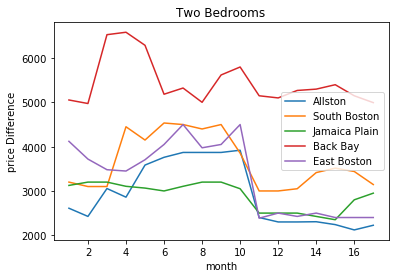

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(1, 18)
plt.plot(x, Allston[1], label = "Allston")
plt.plot(x, South_Boston[1], label = "South Boston")
plt.plot(x, Jamaica_Plain[1], label = "Jamaica Plain")
plt.plot(x, Back_Bay[1], label = "Back Bay")
plt.plot(x, East_Boston[1], label = "East Boston")
plt.xlabel("month")
plt.ylabel("price Difference")
plt.title("Two Bedrooms")
plt.legend()

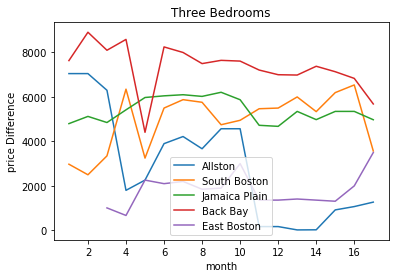

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(1, 18)
plt.plot(x, Allston[2], label = "Allston")
plt.plot(x, South_Boston[2], label = "South Boston")
plt.plot(x, Jamaica_Plain[2], label = "Jamaica Plain")
plt.plot(x, Back_Bay[2], label = "Back Bay")
plt.plot(x, East_Boston[2], label = "East Boston")
plt.xlabel("month")
plt.ylabel("price Difference")
plt.title("Three Bedrooms")
plt.legend()